<a href="https://colab.research.google.com/github/kinoshita-hiroki/kaggle/blob/main/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# todo
- 連続値

# 準備
KaggleのタイタニックコンペティションのページからDataをダウンロードする → [Download All]

https://www.kaggle.com/c/titanic/data#

自分のGoogle Driveを開いて任意の場所にタイタニックデータ3つ(gender_submission.csv, test.csv, train.csv)をアップロードする
※ここでは マイドライブ/KaggleLearning/Titanic ディレクトリ配下に置いた

ランタイム接続し、左側メニューの「ファイル」を選択して出てきたウィンドウの中の「ドライブをマウント」を押下すと以下のコマンドが出てくる。これを実行する。

In [28]:
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/Titanic/test.csv")

## ニューラルネット

In [5]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import pandas as pd

# データ解析
メモ
- 連続値 -> 年齢とFare連続値
- Nanが存在する -> Age, Cabin, Embarked

- Parch, SibSp両方独身かそれ以外で見た方がいいかも
- 男が死にやすい
- Cabin != nullのが生存率高い
- Age != nullのが生存率高い
- FareやPclassが良いほど生きてる

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinEx'],
      dtype='object')

In [9]:
def replace_data(data):
  return data.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

In [10]:
df_train.loc[:, ["CabinEx"]] = 0
df_train[df_train.loc[:, ["Cabin"]].notnull()].loc[:, ["CabinEx"]] = 1

In [11]:
df_train.loc[:, ["Cabin", "CabinEx"]]

,Cabin,CabinEx
0,NaN,0
1,C85,0
2,NaN,0
3,C123,0
4,NaN,0
...,...,...
886,NaN,0
887,B42,0
888,NaN,0
889,C148,0


In [12]:
replace_data(df_train).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinEx
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555,NaN
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835,NaN
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593,NaN
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186,NaN
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606,NaN
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320,NaN
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462,NaN
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000,NaN
CabinEx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sns.heatmap(replace_data(df_train).corr())

NameError: ignored

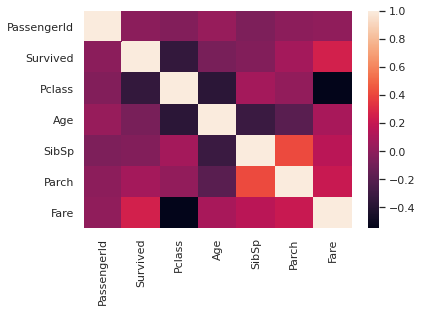

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(df_train.corr())

In [ ]:
age_suv = df_train.loc[:, ["Age", "Survived"]]

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.loc[:, "Cabin"].value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
E17              1
A24              1
C85              1
B39              1
E12              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
ca_suv = df_train.loc[:, ["Cabin", "Survived"]]

In [ ]:
ca_suv[ca_suv["Cabin"].isnull()].loc[:, "Survived"].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [ ]:
ca_suv.loc[:, "Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train.loc[:, "Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
pd.cut(df_train["Age"], 5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888                 NaN
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] <
                                    (48.168, 64.084] < (64.084, 80.0]]

In [ ]:
df_train.pivot_table(values="Survived", index="Embarked")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
df_train.pivot_table(values="Survived", index="SibSp", aggfunc=sum)

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


# モデル

In [29]:
import numpy as np

def round(pred):
  return np.round(pred)

In [27]:
!pip install optuna

     |████████████████████████████████| 301 kB 37.9 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 164 kB 62.5 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 141 kB 62.2 MB/s 
     |████████████████████████████████| 111 kB 58.0 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=25b7d8ccdec254b66e94f180e63da27fa5ef1a3073dedbe833f6b49182edaf78
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [31]:
import optuna.integration.lightgbm as lgb
import lightgbm as lgb
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.model_selection import train_test_split

categorical_features = ['Sex', 'Ticket', 'Cabin', 'Embarked']

origin_train_valid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/Titanic/train.csv")
origin_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/Titanic/test.csv")

origin_train["TrainFlag"] = True
origin_test["TrainFlag"] = False

df_all = origin_train.append(origin_test)
df_all.index = df_all["PassengerId"]

df_all.drop(["PassengerId", "Name"], axis = 1, inplace = True)
df_all = pd.get_dummies(df_all, drop_first=True)

df_train = df_all[df_all["TrainFlag"] == True]
df_train = df_train.drop(["TrainFlag"], axis = 1)

df_test = df_all[df_all["TrainFlag"] == False]
df_test = df_test.drop(["TrainFlag"], axis = 1)
df_test = df_test.drop(["Survived"], axis = 1)

y = df_train["Survived"].values
X = df_train.drop("Survived", axis=1).values

train_X, valid_X, train_y, valid_y = train_test_split(X, y) 

lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(valid_X, valid_y, reference=lgb_train)

params = {'objective': 'binary', 'seed': 71, 'verbose': 0, 'metrics': 'binary_logloss'}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50
               )

model = lgb.train(params, lgb_train, num_boost_round=100)
test_pred = gbm.predict(df_test, num_iteration=gbm.best_iteration)

print(round(test_pred))

[1]	training's binary_logloss: 0.613154	valid_1's binary_logloss: 0.644961
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.576469	valid_1's binary_logloss: 0.609883
[3]	training's binary_logloss: 0.546426	valid_1's binary_logloss: 0.581283
[4]	training's binary_logloss: 0.521195	valid_1's binary_logloss: 0.558813
[5]	training's binary_logloss: 0.500041	valid_1's binary_logloss: 0.538233
[6]	training's binary_logloss: 0.48234	valid_1's binary_logloss: 0.522405
[7]	training's binary_logloss: 0.466585	valid_1's binary_logloss: 0.509463
[8]	training's binary_logloss: 0.451531	valid_1's binary_logloss: 0.497447
[9]	training's binary_logloss: 0.439667	valid_1's binary_logloss: 0.487485
[10]	training's binary_logloss: 0.428546	valid_1's binary_logloss: 0.478649
[11]	training's binary_logloss: 0.416346	valid_1's binary_logloss: 0.466924
[12]	training's binary_logloss: 0.405555	valid_1's binary_logloss: 0.45619
[13]	training's binary_logloss: 0.396

In [33]:
pd.DataFrame({
    "PassengerId": pte.loc[:, "PassengerId"],
    "Survived": [int(s) for s in round(test_pred)]
}).set_index("PassengerId").to_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/Titanic/result.csv")